**Problem Statement:**

**Assignment Part-I**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

**Step 1 : Read and find the details of the Data**

In [1]:
# Importing necessary packages
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the Dataset
df_house = pd.read_csv("/content/drive/MyDrive/train.csv")
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Reading number of rows and columns
df_house.shape

(1460, 81)

In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Details of the dataset
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Step 2 : Data Understanding, Preparation and EDA**

In [6]:
#finding columns containing null values.
df_house.select_dtypes(include='object').isnull().sum()[df_house.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
#replacing NaN values with None
na_cols = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure' ,'BsmtFinType1','BsmtFinType2', 'Electrical',
          'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC','Fence', 'MiscFeature']

for i in na_cols:
    df_house[i] =df_house[i].fillna("None")

In [8]:
#double check on the NaN values
df_house.select_dtypes(include='object').isnull().sum()[df_house.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

No null values are present in the categorical variables anymore

**Removing skewed attributes**

 - We cannot keep categorical and numerical variables that contain more than 85% of the same data(skewed data),
  else they might corrupt the results.
  - Hence we will find out the columns that contain skewed and drop those columns.

In [9]:
col_list = list()
for i in df_house.select_dtypes("object"):
    print(i, ' = ' , df_house[i].value_counts(normalize=True).max()) 
    if df_house[i].value_counts(normalize=True).max()>0.85:
        col_list.append(i)
        
print(col_list)

MSZoning  =  0.7883561643835616
Street  =  0.9958904109589041
Alley  =  0.9376712328767123
LotShape  =  0.6335616438356164
LandContour  =  0.897945205479452
Utilities  =  0.9993150684931507
LotConfig  =  0.7205479452054795
LandSlope  =  0.9465753424657535
Neighborhood  =  0.1541095890410959
Condition1  =  0.863013698630137
Condition2  =  0.9897260273972602
BldgType  =  0.8356164383561644
HouseStyle  =  0.49726027397260275
RoofStyle  =  0.7815068493150685
RoofMatl  =  0.9821917808219178
Exterior1st  =  0.3527397260273973
Exterior2nd  =  0.3452054794520548
MasVnrType  =  0.5972602739726027
ExterQual  =  0.6205479452054794
ExterCond  =  0.8780821917808219
Foundation  =  0.44315068493150683
BsmtQual  =  0.44452054794520546
BsmtCond  =  0.897945205479452
BsmtExposure  =  0.6527397260273973
BsmtFinType1  =  0.2945205479452055
BsmtFinType2  =  0.8602739726027397
Heating  =  0.9780821917808219
HeatingQC  =  0.5075342465753425
CentralAir  =  0.934931506849315
Electrical  =  0.9136986301369863
K

In [10]:
#Dropping the columns filtered above

df_house.drop(col_list, axis=1, inplace = True)

In [11]:
col_num_list = list()

for i in df_house.select_dtypes(include=['int64','float64']):
    if df_house[i].value_counts(normalize=True).max() > 0.85:
        col_num_list.append(i)
        
df_house.drop(col_num_list, axis=1, inplace=True)

In [12]:
df_house.shape

(1460, 51)

Find the null values in numerical attributes and replace them.

In [13]:
num_cols = df_house.select_dtypes(include=['int64','float64'])

num_cols.isnull().sum()[num_cols.isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [14]:
#Replacing these 3 column data to their respective mean values
df_house['LotFrontage'] = df_house['LotFrontage'].replace(np.nan ,df_house['LotFrontage'].median())

df_house['MasVnrArea'] = df_house['MasVnrArea'].replace(np.nan, df_house['MasVnrArea'].median())

In [15]:
df_house['GarageYrBlt'] = df_house['GarageYrBlt'].replace(np.nan, df_house['GarageYrBlt'].median())

In [16]:
df_house.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
Fence            0
MoSold           0
YrSold           0
SaleCondition    0
SalePrice        0
dtype: int64

No more null values in the dataset

In [17]:
#Further cleaning is required for column "MoSold" as it is not important for analysis
df_house.drop('MoSold', axis=1, inplace=True)
df_house.shape


(1460, 50)

Creating new column by combining existing columns

In [18]:
#Adding Column 'Remodelled' if a house is remodelled or not

def Remodel(r):
    if(r['YearBuilt'] == r['YearRemodAdd']):
        return 0
    elif(r['YearBuilt'] < r['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_house['Remodelled'] = df_house.apply(Remodel, axis=1)

In [19]:
#Adding Column 'BuildRemodelAge' to quantify age of house after being built or remodelled.

def buildRemodelAge(r):
    if(r['YearBuilt'] == r['YearRemodAdd']):
        return r['YrSold'] - r['YearBuilt']
    else:
        return r['YrSold'] - r['YearRemodAdd']
       
df_house['BuildRemodelAge'] = df_house.apply(buildRemodelAge, axis=1)

In [20]:
# setting new Column  'oldNewGarage' to check if garage is old(0) or new(1).
def constructionPeriod(r):
    if r == 0:
        return 0
    elif r >= 1900 and r < 2000:        
        return 0
    else:   
        return 1
    
df_house['oldNewGarage'] = df_house['GarageYrBlt'].apply(constructionPeriod)

In [21]:
#Dropping old features , as they are not required and we have created new features based on them. 

df_house.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [22]:
df_house.shape

(1460, 49)

Removing Duplicates

In [23]:
#Check for duplicate values in the dataset

df_house.drop_duplicates()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,Remodelled,BuildRemodelAge,oldNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Reg,Inside,Gilbert,1Fam,2Story,...,2,460,0,40,None,Normal,175000,1,7,0
1456,1457,20,RL,85.0,13175,Reg,Inside,NWAmes,1Fam,1Story,...,2,500,349,0,MnPrv,Normal,210000,1,22,0
1457,1458,70,RL,66.0,9042,Reg,Inside,Crawfor,1Fam,2Story,...,1,252,0,60,GdPrv,Normal,266500,1,4,0
1458,1459,20,RL,68.0,9717,Reg,Inside,NAmes,1Fam,1Story,...,1,240,366,0,None,Normal,142125,1,14,0


Hence we see that there are no duplicates in the dataset

In [24]:
# Checking outliers at 25%,50%,75%,90%,95% and above

df_house.describe(percentiles=[0.25,0.5,0.75,0.90,0.95])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Remodelled,BuildRemodelAge,oldNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,2336.000000,6110.000000,...,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,755000.000000,1.000000,60.000000,1.000000


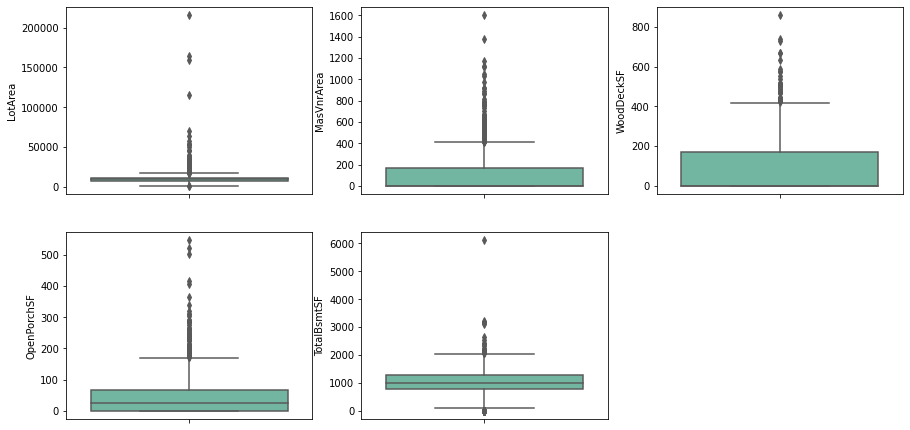

In [25]:
num_list = ['LotArea','MasVnrArea','WoodDeckSF','OpenPorchSF','TotalBsmtSF']

plt.figure(figsize=[15,20])
count=1
for i in num_list:
    plt.subplot(5,3,count)
    sns.boxplot(y=i, palette="Set2", data=df_house)
    count= count+1
plt.show()

In [26]:

# Removing values beyond 98% for MasVnrArea

qtl_MasVnrArea = df_house['MasVnrArea'].quantile(0.98)
df_house = df_house[df_house["MasVnrArea"] < qtl_MasVnrArea]

# Removing data beyond 98% for LotArea

qtl_LotArea = df_house['LotArea'].quantile(0.98)
df_house = df_house[df_house["LotArea"] < qtl_LotArea]

# Removing values beyond 99% for TotalBsmtSF

qtl_TotalBsmtSF = df_house['TotalBsmtSF'].quantile(0.99)
df_house = df_house[df_house["TotalBsmtSF"] < qtl_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

qtl_WoodDeckSF = df_house['WoodDeckSF'].quantile(0.99)
df_house = df_house[df_house["WoodDeckSF"] < qtl_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

qtl_OpenPorchSF = df_house['OpenPorchSF'].quantile(0.99)
df_house = df_house[df_house["OpenPorchSF"] < qtl_OpenPorchSF]

In [27]:
# Finding the retained data after removal

print((round(df_house.shape[0])/1460)*100)

93.01369863013699


**Step 3: Data Visualisation**

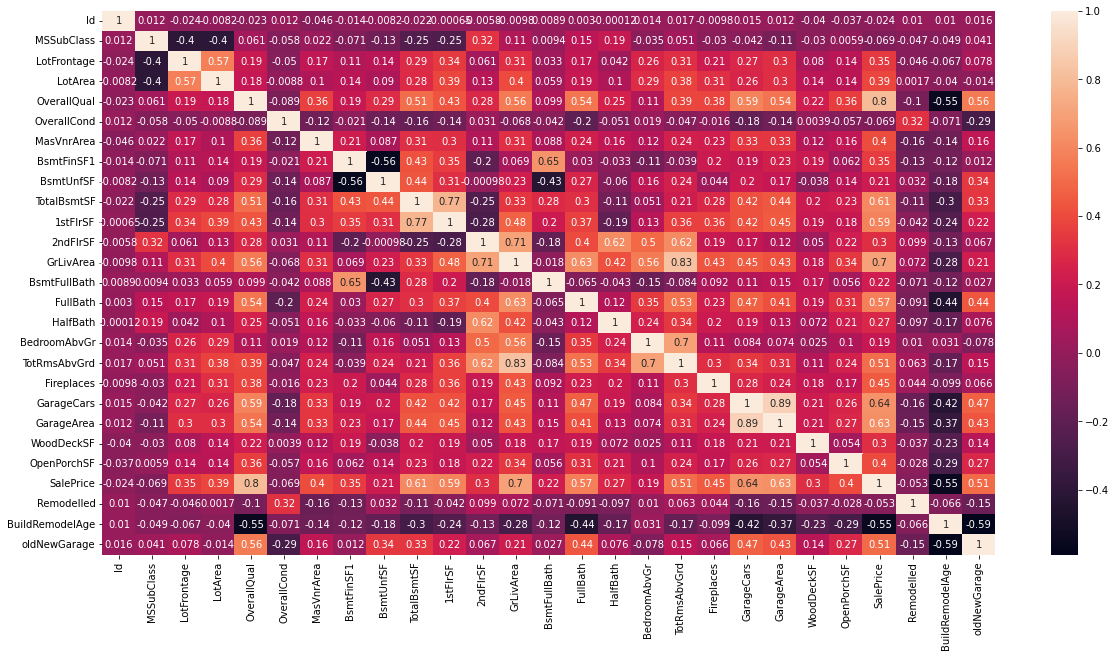

In [28]:
#Correlation matrix for the dataset
plt.figure(figsize=(20,10))
sns.heatmap(df_house.corr(), annot=True)
plt.show()

**Comments:**

- We need to remove highly collinear features except those which affect the dependent variable.
- We can see 'TotRmsAbvGrd' and 'GrLivArea' have a collinearity of 83% .
- Also 'GarageCars' and 'GarageArea' have a collinearity of 89%.

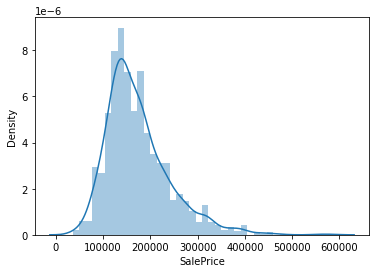

In [29]:
sns.distplot(df_house['SalePrice'])

In [30]:
print("Skewness: %f" % df_house['SalePrice'].skew())
print("Kurtosis: %f" % df_house['SalePrice'].kurt())

Skewness: 1.322923
Kurtosis: 2.915361


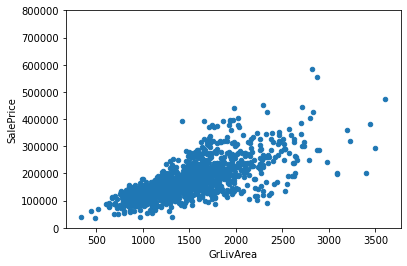

In [31]:
var = 'GrLivArea'
data = pd.concat([df_house['SalePrice'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

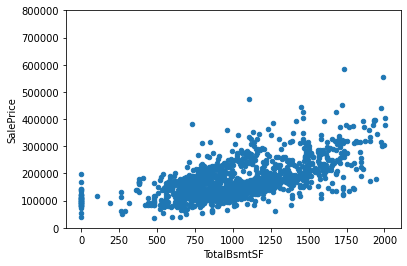

In [32]:
var = 'TotalBsmtSF'
data = pd.concat([df_house['SalePrice'], df_house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

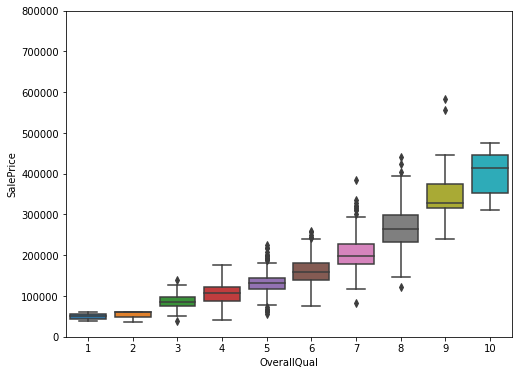

In [33]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_house['SalePrice'], df_house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

<Figure size 720x360 with 0 Axes>

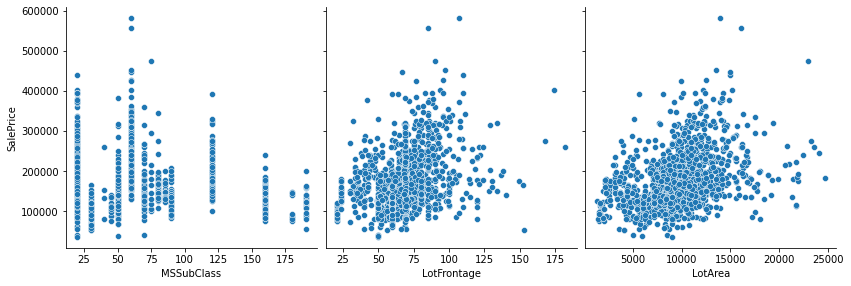

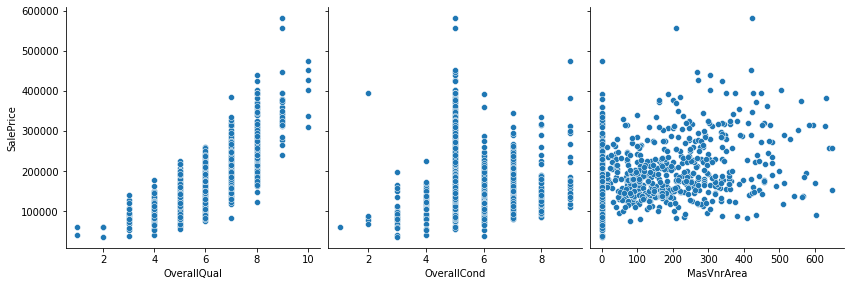

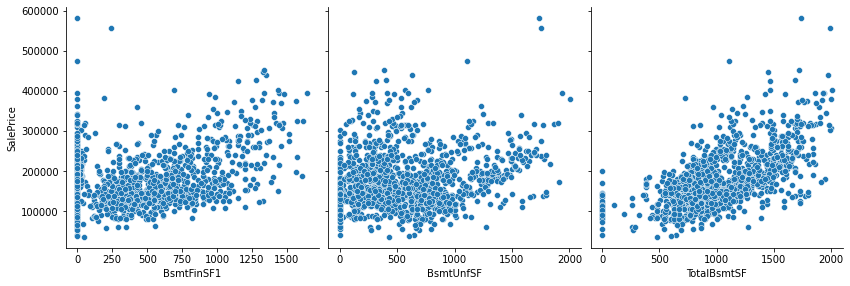

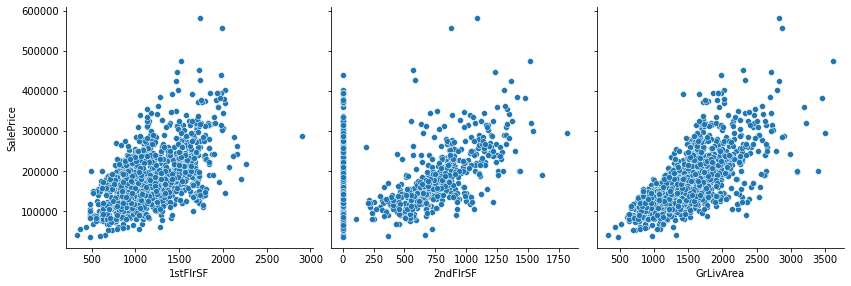

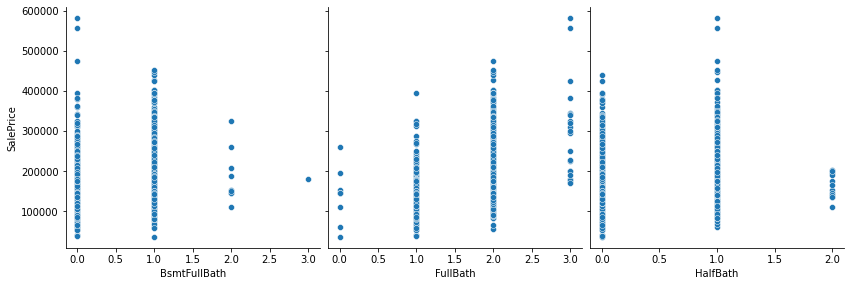

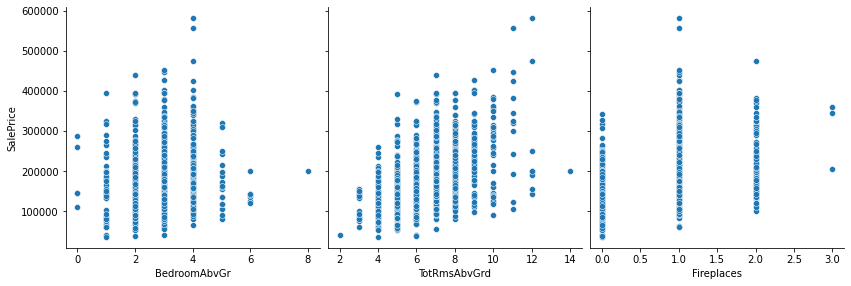

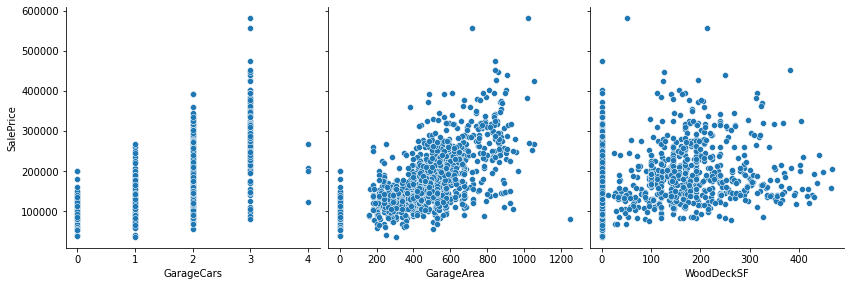

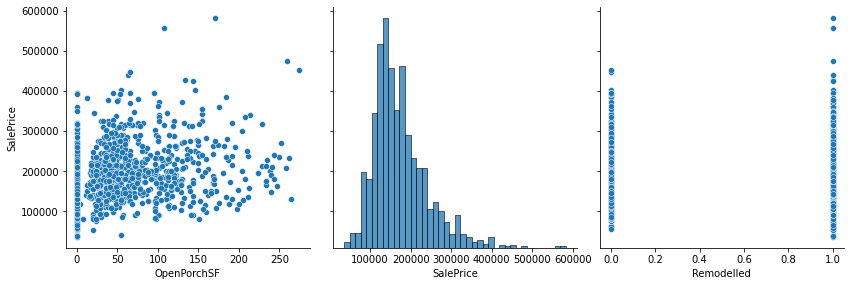

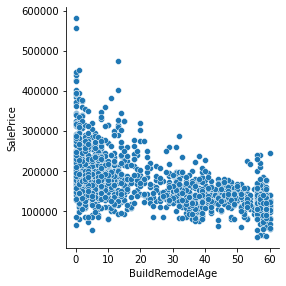

In [34]:
plt.figure(figsize=(10,5))
sns.pairplot(df_house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['OpenPorchSF','SalePrice', 'Remodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house, x_vars=['BuildRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')

plt.show()

**Comments:**

- Most of the feature data are scattered except 'LotArea', '1stFlrSF'and 'GrLivArea' which show some correlation with 'SalePrice'.
- We will analyse the other features further below.

In [35]:
#Removing highly collinear features as discussed above.
df_house.drop(['TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)

In [36]:
df_house.shape

(1358, 47)

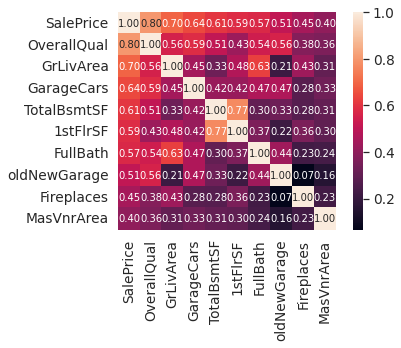

In [37]:
#Lets have a closer look at the correlation matrix with only high correlations with SalePrice
corMat = df_house.corr()
k = 10 #number of variables for heatmap
cols = corMat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Step 4: Data Preparation**

In [38]:
#We are converting categorical variables to numerical features

In [39]:
df_house.select_dtypes("object").columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')

In [40]:
df_house['LotShape'] = df_house['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_house['ExterQual'] = df_house['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df_house['BsmtQual'] = df_house['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house['BsmtExposure'] = df_house['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_house['BsmtFinType1'] = df_house['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df_house['HeatingQC'] = df_house['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house['KitchenQual'] = df_house['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house['FireplaceQu'] = df_house['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house['GarageFinish'] = df_house['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df_house['BldgType'] = df_house['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df_house['HouseStyle'] = df_house['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df_house['Fence'] = df_house['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df_house['LotConfig'] = df_house['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df_house['MasVnrType'] = df_house['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df_house['SaleCondition'] = df_house['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})


In [41]:
df_house.shape

(1358, 47)

In [42]:
#Dummy creation for remaining categorical variables
dum_MSZ = pd.get_dummies(df_house['MSZoning'],prefix = 'MSZoning', drop_first=True)
df_house = pd.concat([df_house,dum_MSZ] , axis=1)

dum_Neighborhood = pd.get_dummies(df_house['Neighborhood'],prefix = 'Neighborhood', drop_first=True)
df_house = pd.concat([df_house,dum_Neighborhood] , axis=1)

dum_RoofStyle = pd.get_dummies(df_house['RoofStyle'],prefix = 'RoofStyle', drop_first=True)
df_house = pd.concat([df_house,dum_RoofStyle] , axis=1)

dum_Exterior1st = pd.get_dummies(df_house['Exterior1st'],prefix = 'Exterior1st', drop_first=True)
df_house = pd.concat([df_house,dum_Exterior1st] , axis=1)

dum_Exterior2nd = pd.get_dummies(df_house['Exterior2nd'],prefix = 'Exterior2nd', drop_first=True)
df_house = pd.concat([df_house,dum_Exterior2nd] , axis=1)

dum_Foundation = pd.get_dummies(df_house['Foundation'],prefix = 'Foundation', drop_first=True)
df_house = pd.concat([df_house,dum_Foundation] , axis=1)

dum_GarageType = pd.get_dummies(df_house['GarageType'],prefix = 'GarageType', drop_first=True)
df_house = pd.concat([df_house,dum_GarageType] , axis=1)

In [43]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,1,60,RL,65.0,8450,3,5,CollgCr,1,4,...,1,0,0,0,1,0,0,0,0,0
1,2,20,RL,80.0,9600,3,2,Veenker,1,1,...,0,0,0,0,1,0,0,0,0,0
2,3,60,RL,68.0,11250,2,5,CollgCr,1,4,...,1,0,0,0,1,0,0,0,0,0
3,4,70,RL,60.0,9550,2,4,Crawfor,1,4,...,0,0,0,0,0,0,0,0,1,0
4,5,60,RL,84.0,14260,2,2,NoRidge,1,4,...,1,0,0,0,1,0,0,0,0,0


In [44]:
# drop the below columns as we now have new columns derived from these columns

df_house = df_house.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

df_house.head()


,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,1,60,65.0,8450,3,5,1,4,7,5,...,1,0,0,0,1,0,0,0,0,0
1,2,20,80.0,9600,3,2,1,1,6,8,...,0,0,0,0,1,0,0,0,0,0
2,3,60,68.0,11250,2,5,1,4,7,5,...,1,0,0,0,1,0,0,0,0,0
3,4,70,60.0,9550,2,4,1,4,7,5,...,0,0,0,0,0,0,0,0,1,0
4,5,60,84.0,14260,2,2,1,4,8,5,...,1,0,0,0,1,0,0,0,0,0


In [45]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 113 entries, Id to GarageType_None
dtypes: float64(2), int64(38), uint8(73)
memory usage: 564.1 KB


**Step 5: Model Building**

In [46]:
y = df_house['SalePrice']
y.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [47]:
X = df_house.drop(['SalePrice'],axis=1)
X.head(5)

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,1,60,65.0,8450,3,5,1,4,7,5,...,1,0,0,0,1,0,0,0,0,0
1,2,20,80.0,9600,3,2,1,1,6,8,...,0,0,0,0,1,0,0,0,0,0
2,3,60,68.0,11250,2,5,1,4,7,5,...,1,0,0,0,1,0,0,0,0,0
3,4,70,60.0,9550,2,4,1,4,7,5,...,0,0,0,0,0,0,0,0,1,0
4,5,60,84.0,14260,2,2,1,4,8,5,...,1,0,0,0,1,0,0,0,0,0


In [48]:
# scaling the features

from sklearn.preprocessing import scale

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=112)

In [49]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# split into train and test
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

In [51]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [52]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [53]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

**bRidge Regression:**

In [54]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
# display the mean scores

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
23,50,-14597.996529,-15651.041076,1
24,100,-14712.978805,-15651.420180,2
22,20,-14522.744439,-15678.765029,3
21,10.0,-14497.461694,-15706.124670,4
20,9.0,-14495.627079,-15710.786393,5
19,8.0,-14493.925498,-15716.110717,6
18,7.0,-14492.454203,-15722.300796,7
17,6.0,-14491.397855,-15729.245247,8
16,5.0,-14490.405167,-15737.237718,9
15,4.0,-14489.445890,-15748.826572,10


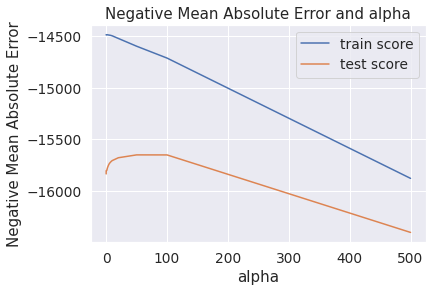

In [56]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [57]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_

Ridge(alpha=50)

In [58]:
# check the coefficient values with alpha = 100

alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_


array([-3520.10039511,  4378.21407003, -5022.64740484, 10849.22251534,
        3970.31280118,  3475.45141698,  5363.85752733,  3662.65698116,
        5044.38601767,  6075.64103975,  4720.85439852,  1741.01789436,
        6801.56479557,  7216.69040202, 11151.41198961,  1984.43814637,
        2512.23990806, -1465.50643956,  4183.26264243,  2512.16823545,
        -287.40176841,  5434.00953988,  2033.54218101,  1706.68978373,
       -2369.30176999,  2028.87559279,  4459.74445867,   263.10671123,
        1054.36153483,  -424.98992326,  1895.98922468, -1338.72062041,
        4663.98493067,  1850.30205646, -1369.25340317,  6216.99100877,
       -2214.50483879,  4161.00362312,   530.34631987,  2162.09656084,
         746.057735  ,  2329.45165216,  -331.8005608 ,   -67.06586913,
       -2857.28424407,  3161.19349659,   933.8876527 ,  2086.39905045,
         619.42083483,  4273.88277338,  2624.94697565,   863.29600249,
        -186.29514592,  1926.69004759,   311.89394996,  1504.338478  ])

In [59]:
mean_squared_error(y_test, ridge.predict(X_test))

581447218.3987844

In [60]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-3520.1004
1,LotArea,4378.2141
2,BldgType,-5022.6474
3,OverallQual,10849.2225
4,OverallCond,3970.3128
5,MasVnrArea,3475.4514
6,ExterQual,5363.8575
7,BsmtQual,3662.6570
8,BsmtExposure,5044.3860
9,BsmtFinSF1,6075.6410


In [61]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict


{'MSSubClass': -3520.1004,
 'LotArea': 4378.2141,
 'BldgType': -5022.6474,
 'OverallQual': 10849.2225,
 'OverallCond': 3970.3128,
 'MasVnrArea': 3475.4514,
 'ExterQual': 5363.8575,
 'BsmtQual': 3662.657,
 'BsmtExposure': 5044.386,
 'BsmtFinSF1': 6075.641,
 'TotalBsmtSF': 4720.8544,
 'HeatingQC': 1741.0179,
 '1stFlrSF': 6801.5648,
 '2ndFlrSF': 7216.6904,
 'GrLivArea': 11151.412,
 'BsmtFullBath': 1984.4381,
 'FullBath': 2512.2399,
 'BedroomAbvGr': -1465.5064,
 'KitchenQual': 4183.2626,
 'Fireplaces': 2512.1682,
 'FireplaceQu': -287.4018,
 'GarageCars': 5434.0095,
 'WoodDeckSF': 2033.5422,
 'SaleCondition': 1706.6898,
 'BuildRemodelAge': -2369.3018,
 'oldNewGarage': 2028.8756,
 'MSZoning_FV': 4459.7445,
 'MSZoning_RH': 263.1067,
 'MSZoning_RL': 1054.3615,
 'MSZoning_RM': -424.9899,
 'Neighborhood_BrDale': 1895.9892,
 'Neighborhood_CollgCr': -1338.7206,
 'Neighborhood_Crawfor': 4663.9849,
 'Neighborhood_NPkVill': 1850.3021,
 'Neighborhood_NWAmes': -1369.2534,
 'Neighborhood_NridgHt': 6216.

In [62]:
#RFE

# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm)            
rfe = rfe.fit(X_train_ridge, y_train)

In [63]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df


,Features,rfe_support,rfe_ranking,Coefficient
10,GrLivArea,True,1,11151.4120
2,OverallQual,True,1,10849.2225
9,2ndFlrSF,True,1,7216.6904
8,1stFlrSF,True,1,6801.5648
15,Neighborhood_NridgHt,True,1,6216.9910
7,BsmtFinSF1,True,1,6075.6410
12,GarageCars,True,1,5434.0095
4,ExterQual,True,1,5363.8575
6,BsmtExposure,True,1,5044.3860
14,Neighborhood_Crawfor,True,1,4663.9849


In [64]:
print("Ridge Score for Train Set: ",round(ridge.score(X_train,y_train),2))

Ridge Score for Train Set:  0.9


In [65]:
print("Ridge Score for Test Set: ",round(ridge.score(X_test, y_test),2))

Ridge Score for Test Set:  0.88


In [66]:
from sklearn.metrics import r2_score
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
print("Ridge Train R2-Score : ",round(r2_score(y_train, y_pred_train),2))
print("Ridge Test R2-Score : ",round(r2_score(y_test, y_pred_test),2))

Ridge Train R2-Score :  0.9
Ridge Test R2-Score :  0.88


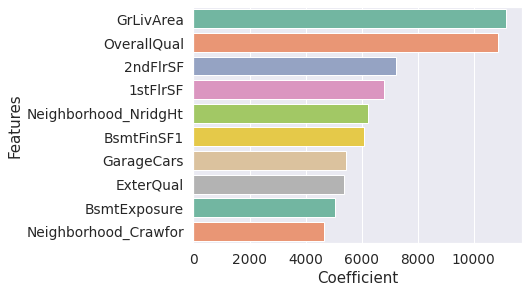

In [67]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp1_df)
plt.show()


The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.

**Lasso Regression:**

In [68]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
# display the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.01,-14488.318026,-15835.279085,1
9,0.005,-14488.319537,-15835.289021,2
8,0.004,-14488.319839,-15835.291009,3
7,0.003,-14488.320141,-15835.292996,4
6,0.002,-14488.320444,-15835.294969,5
5,0.001,-14488.320747,-15835.296935,6
4,0.0005,-14488.320898,-15835.297917,7
3,0.0004,-14488.320928,-15835.298114,8
2,0.0003,-14488.320959,-15835.298310,9
1,0.0002,-14488.320989,-15835.298507,10


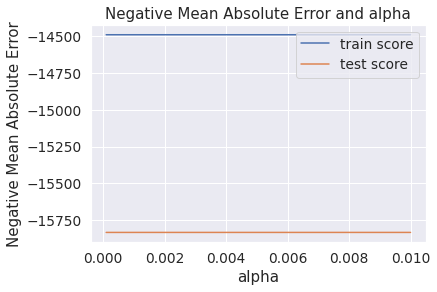

In [70]:
# plotting mean test and train scores with alpha 

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')

#plotting Alpha against Negative Mean Absolute Error
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [71]:
#getting the best estimator for lambda

lasso_model_cv.best_estimator_

Lasso(alpha=0.01)

In [72]:
#checking the coefficient values with lambda = 0.01

alpha = 0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-3822.39522832,  4505.34480923, -6265.88788668, 11877.59495645,
        4379.108958  ,  3046.33596976,  4917.82439621,  3651.77769215,
        5398.14463166,  6499.95234975,  4760.10306254,  1875.97417028,
       11049.16285641, 12900.2961992 ,  8409.76232165,  1793.6860689 ,
        1662.94145015, -3409.72171329,  3462.37750874,  2752.90018696,
       -1993.65084122,  6150.29480321,  2166.26603744,  1615.99907616,
       -1884.7081754 ,  2014.07341959,  8215.2543072 ,  2298.14857075,
        7220.06474689,  5551.52422587,  2237.89950706, -1466.67299385,
        5033.79778752,  2523.89675113, -1572.92866707,  7219.94573049,
       -2575.79239156,  4640.11898523,  4085.16515953,  5387.72099408,
        1332.96808381,  2239.52798449, -7590.09283364, -3703.34747555,
       -4775.84531699, 10486.24789733,  4281.16554556,  4131.05753147,
        2984.346456  ,  6519.32769648,  3922.32263245,  6623.625336  ,
        1206.70738658,  4830.42771068,  6413.33949394,  5590.00603801])

In [73]:
# Checking the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))

572008273.4102937

In [74]:
# Putting the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df


,Features,Coefficient
0,MSSubClass,-3822.3952
1,LotArea,4505.3448
2,BldgType,-6265.8879
3,OverallQual,11877.5950
4,OverallCond,4379.1090
5,MasVnrArea,3046.3360
6,ExterQual,4917.8244
7,BsmtQual,3651.7777
8,BsmtExposure,5398.1446
9,BsmtFinSF1,6499.9523


In [75]:
# Putting the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -3822.3952283194512,
 'LotArea': 4505.344809229563,
 'BldgType': -6265.887886681612,
 'OverallQual': 11877.594956450142,
 'OverallCond': 4379.1089580012,
 'MasVnrArea': 3046.335969759975,
 'ExterQual': 4917.824396209326,
 'BsmtQual': 3651.7776921472605,
 'BsmtExposure': 5398.144631661023,
 'BsmtFinSF1': 6499.952349748239,
 'TotalBsmtSF': 4760.103062540385,
 'HeatingQC': 1875.9741702782212,
 '1stFlrSF': 11049.162856413774,
 '2ndFlrSF': 12900.296199199176,
 'GrLivArea': 8409.76232165492,
 'BsmtFullBath': 1793.6860689034093,
 'FullBath': 1662.941450150219,
 'BedroomAbvGr': -3409.721713288311,
 'KitchenQual': 3462.3775087440517,
 'Fireplaces': 2752.9001869612193,
 'FireplaceQu': -1993.6508412184623,
 'GarageCars': 6150.294803208242,
 'WoodDeckSF': 2166.2660374371867,
 'SaleCondition': 1615.999076159516,
 'BuildRemodelAge': -1884.708175400613,
 'oldNewGarage': 2014.0734195928037,
 'MSZoning_FV': 8215.254307201147,
 'MSZoning_RH': 2298.148570751185,
 'MSZoning_RL': 7220.064746

In [76]:
# RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm)            
rfe = rfe.fit(X_train_lasso, y_train)

In [77]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assigning top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
9,2ndFlrSF,True,1,12900.296199
2,OverallQual,True,1,11877.594956
8,1stFlrSF,True,1,11049.162856
19,Exterior2nd_CmentBd,True,1,10486.247897
10,GrLivArea,True,1,8409.762322
13,MSZoning_FV,True,1,8215.254307
15,Neighborhood_NridgHt,True,1,7219.945730
24,GarageType_Attchd,True,1,6623.625336
22,Foundation_PConc,True,1,6519.327696
7,BsmtFinSF1,True,1,6499.952350


In [78]:
print("Lasso Score for Train Set: ", round(lasso.score(X_train,y_train),2))
print("Lasso Score for Test Set: ", round(lasso.score(X_test,y_test),2))


Lasso Score for Train Set:  0.9
Lasso Score for Test Set:  0.88


In [79]:
from sklearn.metrics import r2_score
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)
print("Lasso Train R2-Score : ",round(r2_score(y_train, y_pred_train),2))
print("Lasso Test R2-Score : ",round(r2_score(y_test, y_pred_test),2))


Lasso Train R2-Score :  0.9
Lasso Test R2-Score :  0.88


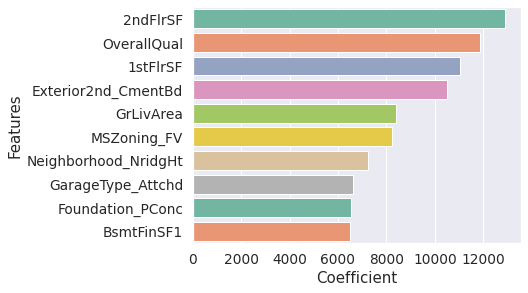

In [80]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set2', data = temp2_df)
plt.show()

**Conclusion:**

- Observations from analysis above: 
       - Score(approx.) for Ridge Regression:-
       > Train Set : 0.89
       > Test Set : 0.88

       - Score for Lasso Regression:-
       > Train Set : 0.90
       > Test Set : 0.88

       - Ridge Train R2-Score :  0.9
         Ridge Test R2-Score :  0.88

       - Lasso Train R2-Score :  0.9
         Lasso Test R2-Score :  0.88

 - The Mean Squared error in case of Ridge and Lasso are:
       > Ridge : 58144721.399
       > Lasso : 572008273.411
   (MSE for Lasso is lesser than that of Ridge)

 - Lasso Regression helps in Feature Reduction , we select the features with high coefficients in Lasso Regression.
 - Second floor square feet ,Overall Quality of the house, Exterior covering on house, First Floor square feet,   Above            grade (ground) living area square feet , Physical locations within Ames city limits, Type of foundation, Type 1 finished        square feet, Size of garage in car capacity and walkout or garden level walls are the top 10 factors that affect the            Sale Price of the houses most.
